In [1]:
 # Importing library

import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading Heart-attack dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart1.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Data Description**

**Age:** Age of the patient (years)

**Sex:** Sex of the patient (F [0] : Female, M [1] : Male)

**ChestPainType:** Type of chest pain

*   TA [0] : Typical Angina
*   ATA [1] : Atypical Angina
*   NAP [2] : Non-Anginal Pain
*   ASY [3] : Asymptomatic

**RestingBP:** Resting blood pressure (mm Hg)

**Cholesterol:** Serum cholesterol fetched via BMI sensor (mm/dl) 

**FastingBS:** Fasting blood sugar (1: FastingBS > 120 mg/dl, 0: otherwise)

**RestingECG:** Resting electrocardiographic results

*   Normal [0] : normal
*   ST [1] : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   LVH [2] : showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR:** maximum heart rate achieved (Numeric value between 60 and 202)

**ExerciseAngina:** exercise induced angina (Y [1] = yes; N [0] = no)

**Oldpeak:** Previous peak = ST (Numeric value measured in depression)

**ST_Slope:** the slope of the peak exercise ST segment

*   Up [0] : upsloping
*   Flat [1] : flat
*   Down [2] : downsloping

**HeartDisease:** output class **[1: heart disease, 0: Normal]**

In [4]:
# Dataset description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Defining target
target = 'HeartDisease'

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

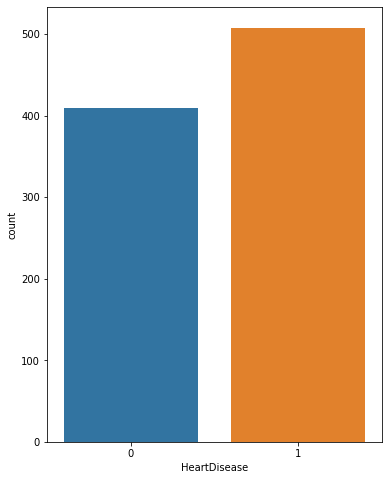

In [8]:
plt.figure(figsize=[6, 8])
sns.countplot(df[target]);

In [9]:
df[target].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# **Categorical features distribution**

## **Age**

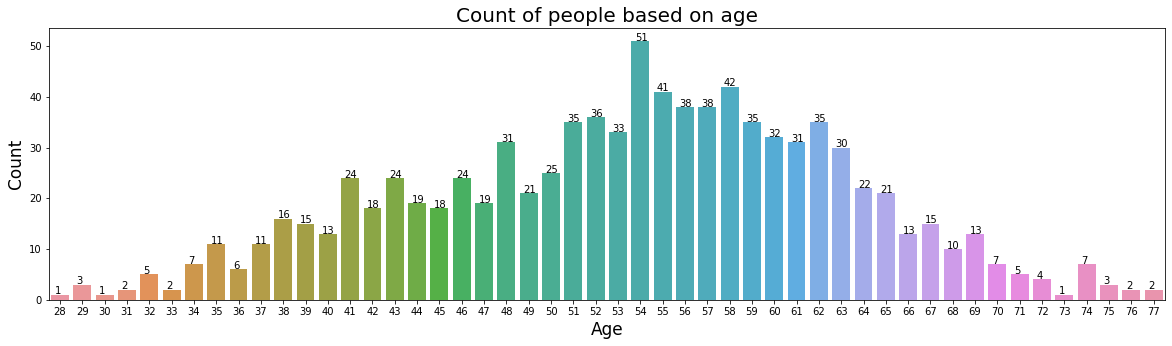

In [10]:
plt.figure(figsize = (20,5))
plot = sns.countplot(df.Age)
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
plot.set_title("Count of people based on age", fontsize = 20)
plt.xlabel("Age",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.show()

## **Chest Pain**

In [11]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

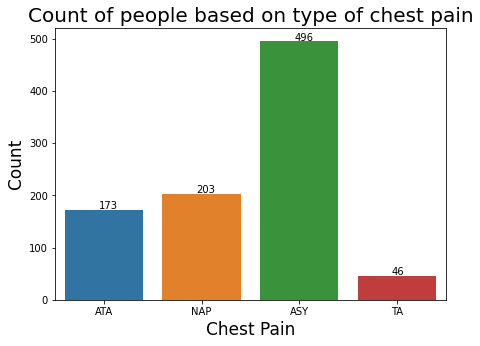

In [12]:
plt.figure(figsize = (7,5))
plot = sns.countplot(df.ChestPainType)
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1.2))
plot.set_title("Count of people based on type of chest pain", fontsize = 20)
plt.xlabel("Chest Pain",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.show()

In [13]:
df.groupby([target, 'ChestPainType']).size().unstack(fill_value=0)

ChestPainType,ASY,ATA,NAP,TA
HeartDisease,,,,
0,104,149,131,26
1,392,24,72,20


In [14]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

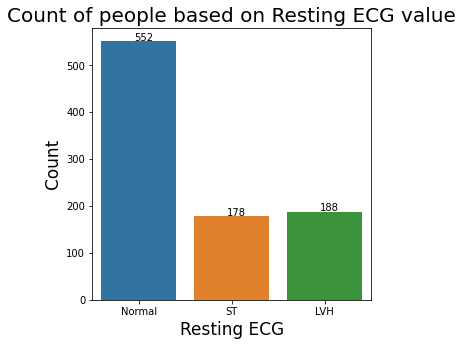

In [15]:
plt.figure(figsize = (5,5))
plot = sns.countplot(df.RestingECG)
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1.2))
plot.set_title("Count of people based on Resting ECG value", fontsize = 20)
plt.xlabel("Resting ECG",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.show()

In [16]:
df.groupby([target, 'RestingECG']).size().unstack(fill_value=0)

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,82,267,61
1,106,285,117


In [17]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

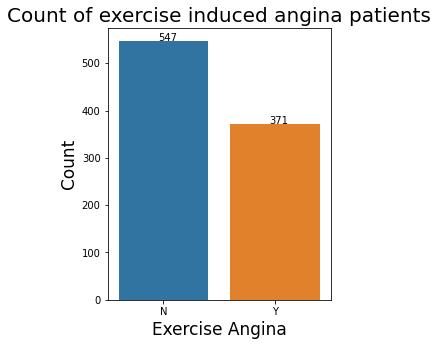

In [18]:
plt.figure(figsize = (4,5))
plot = sns.countplot(df.ExerciseAngina)
for p in plot.patches:
  plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1.2))
plot.set_title("Count of exercise induced angina patients", fontsize = 20)
plt.xlabel("Exercise Angina",fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.show()

In [19]:
df.groupby([target, 'ExerciseAngina']).size().unstack(fill_value=0)

ExerciseAngina,N,Y
HeartDisease,,
0,355,55
1,192,316


## **Plotting corelation of Age and type of Chest Pain with Heart Disease**

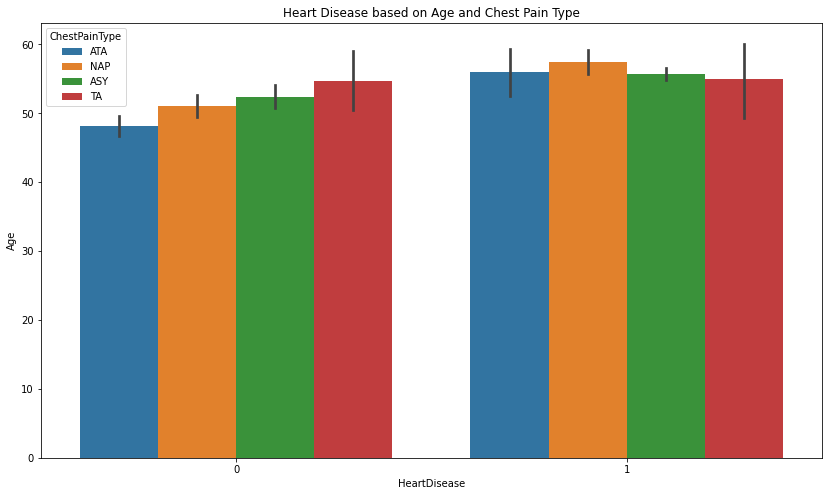

In [20]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='HeartDisease', y='Age', hue='ChestPainType')
fig.set_size_inches([14,8])
plt.title("Heart Disease based on Age and Chest Pain Type")
plt.show()

## **Plotting corelation of Age and Sex with Heart Disease**

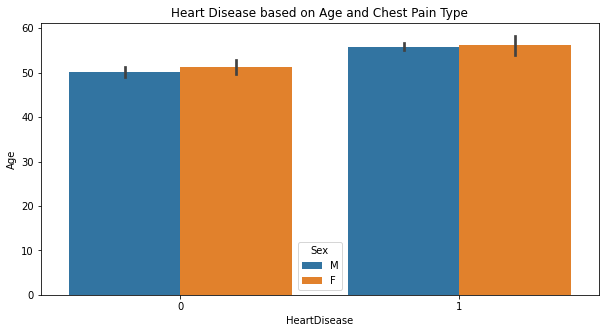

In [21]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='HeartDisease', y='Age', hue='Sex')
fig.set_size_inches([10,5])
plt.title("Heart Disease based on Age and Chest Pain Type")
plt.show()

## **Converting all character labels of features to numeric labels**

In [22]:
df['Sex']=df['Sex'].map({'M': 1, 'F': 0, 1:1, 0:0})
df['ChestPainType'] = df['ChestPainType'].map({'TA':0, 'ATA':1, 'NAP':2, 'ASY':3, 0:0, 1:1, 2:2, 3:3})
df['RestingECG'] = df['RestingECG'].map({'Normal':0,'ST':1, 'LVH':2, 0:0, 1:1, 2:2})
df['ExerciseAngina']=df['ExerciseAngina'].map({'Y': 1, 'N': 0, 1:1, 0:0})
df['ST_Slope'] = df['ST_Slope'].map({'Up':0,'Flat':1, 'Down':2, 0:0, 1:1, 2:2})

# **Plotting the heatmap for all features**

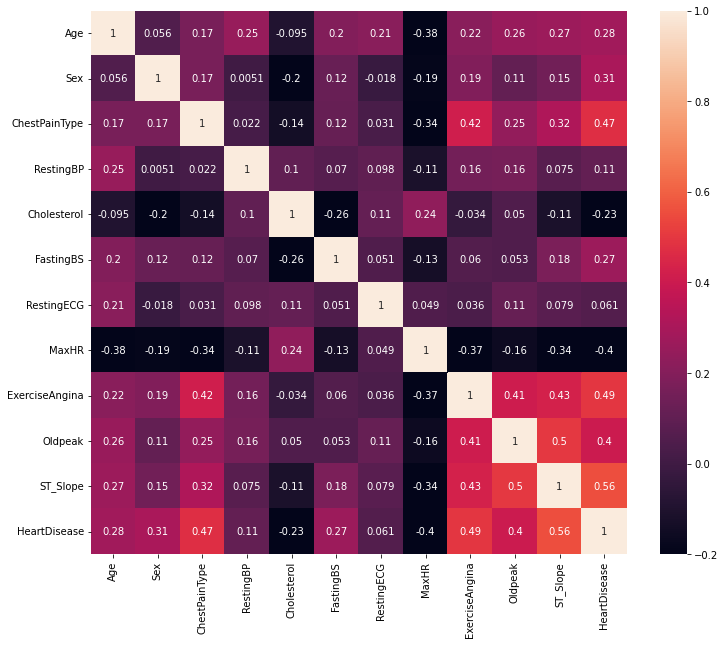

In [23]:
plt.figure(figsize=[12, 10])

sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-0.2)
plt.show()

# **Checking Distribution plot of features for probable heart attack**

In [24]:
probable_Attack = df[df['HeartDisease'] == 1]

**AGE OF THE PERSON**

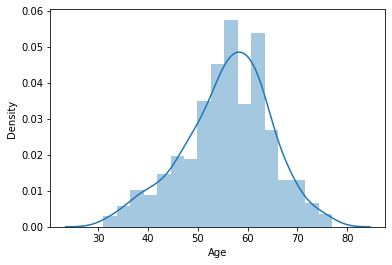

In [25]:
sns.distplot(probable_Attack['Age'])

**SEX OF THE PERSON**

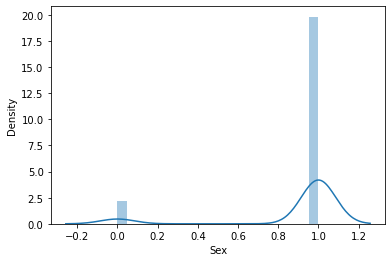

In [26]:
sns.distplot(probable_Attack['Sex']);

**TYPE OF CHEST PAIN**

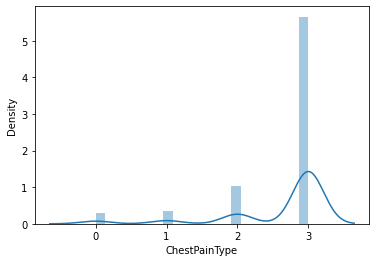

In [27]:
sns.distplot(probable_Attack['ChestPainType']);

**CHOLESTEROL LEVEL**

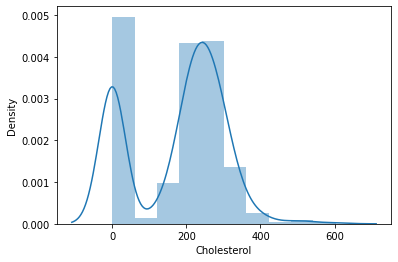

In [28]:
sns.distplot(probable_Attack['Cholesterol']);

**FASTING BLOOD SUGAR**

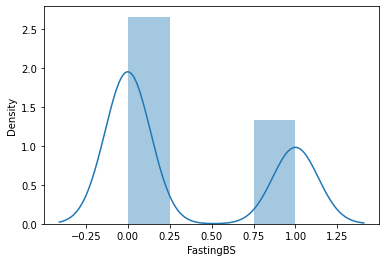

In [29]:
sns.distplot(probable_Attack['FastingBS']);

**MAXIMUM HEART_RATE ACHIEVED**

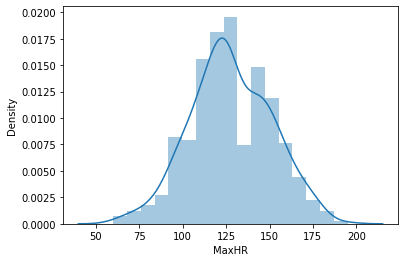

In [30]:
sns.distplot(probable_Attack['MaxHR']);

**RESTING ELECTROCARDIOGRAPIC VALUES**

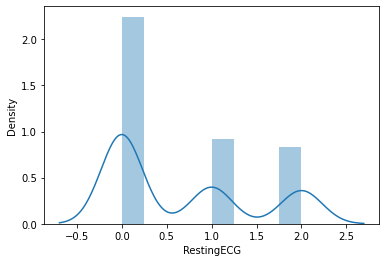

In [31]:
sns.distplot(probable_Attack['RestingECG']);

# **Creating the training set and test set**

In [32]:
from sklearn.model_selection import train_test_split

# Seperate features and target
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=32)

## **Standardizing the values**

In [34]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# Standardizing the training set
X_train_std = X_train
X_train_std = std.fit_transform(X_train_std)

# Standardizing the testing set
X_test_std = X_test
X_test_std = std.transform(X_test_std)

In [35]:
X_train_std

array([[-0.68187894,  0.51316573,  0.81152262, ..., -0.7989949 ,
         1.1527391 , -1.0365834 ],
       [ 1.12153044, -1.94868818, -0.25215167, ..., -0.7989949 ,
        -0.63052207, -1.0365834 ],
       [-0.04538152,  0.51316573, -0.25215167, ..., -0.7989949 ,
        -0.81823378,  0.61385525],
       ...,
       [ 0.48503301, -1.94868818,  0.81152262, ...,  1.25157244,
         1.80973006,  0.61385525],
       [ 0.48503301,  0.51316573, -0.25215167, ...,  1.25157244,
        -0.81823378,  0.61385525],
       [ 0.69719882, -1.94868818,  0.81152262, ..., -0.7989949 ,
        -0.81823378, -1.0365834 ]])

In [36]:
Y_train

299    1
713    0
30     1
529    1
133    1
      ..
892    0
310    0
901    1
555    1
727    1
Name: HeartDisease, Length: 734, dtype: int64

# **IMPLEMENTING VARIOUS ALGORITHMS ON OUR MODEL**

## **1. Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import f1_score, classification_report
pred = lr.predict(X_test_std)

# F1 score
lr_score = f1_score(Y_test, pred)
print(lr_score)

# Classification report
print(classification_report(Y_test, pred))

0.8687782805429864
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        74
           1       0.86      0.87      0.87       110

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



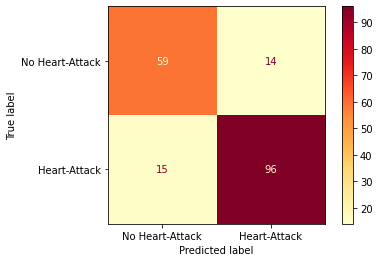

In [39]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(pred, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Heart-Attack", "Heart-Attack"])

cm_display.plot(cmap='YlOrRd')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

print(f'Test Accuracy:- {accuracy_score(Y_test, pred)*100}%')

Test Accuracy:- 84.23913043478261%


## **2. K-nearest neighbors**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=8)

start_time = time.time()
knn.fit(X_train_std, Y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.0034346580505371094


In [42]:
start_time = time.time()
pred = knn.predict(X_test_std)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.015371084213256836


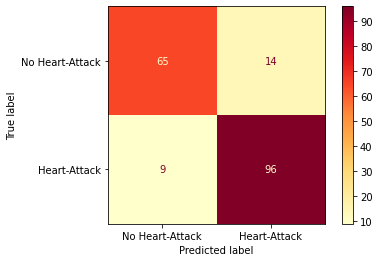

In [43]:
confusion_matrix = metrics.confusion_matrix(pred, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Heart-Attack", "Heart-Attack"])

cm_display.plot(cmap='YlOrRd')
plt.show()

In [44]:
# F1 score
knn_score = f1_score(Y_test, pred)
print(knn_score)

# Classification report
print(classification_report(Y_test, pred))

0.8930232558139534
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        74
           1       0.91      0.87      0.89       110

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [45]:
from sklearn.metrics import accuracy_score

print(f'Test Accuracy:- {accuracy_score(Y_test, pred)*100}%')

Test Accuracy:- 87.5%


## **3. Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_std, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=3, n_jobs=-1)

In [47]:
from sklearn.metrics import f1_score, classification_report

pred = rf.predict(X_test_std)

# F1 score
rf_score = f1_score(Y_test, pred)
print(rf_score)

# Classification report
print(classification_report(Y_test, pred))

0.8858447488584476
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        74
           1       0.89      0.88      0.89       110

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



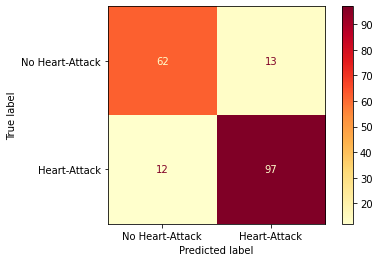

In [48]:
confusion_matrix = metrics.confusion_matrix(pred, Y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Heart-Attack", "Heart-Attack"])

cm_display.plot(cmap='YlOrRd')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

print(f'Test Accuracy:- {accuracy_score(Y_test, pred)*100}%')

Test Accuracy:- 86.41304347826086%
